<a href="https://colab.research.google.com/github/SivakamiKrish/Python_prj/blob/main/CheeseCake_Factory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
from bs4 import BeautifulSoup
from textblob import TextBlob


url = "https://www.trustpilot.com/review/thecheesecakefactory.com"
reviews_count = 15  # The number of reviews you want to retrieve

# Define a threshold for classifying reviews as positive or negative
threshold_polarity = 0.0

# Send an HTTP request to the URL
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    soup = BeautifulSoup(response.text, 'html.parser')


    reviews = soup.find_all('p', class_='typography_body-l__KUYFJ typography_appearance-default__AAY17 typography_color-black__5LYEn')

    if reviews:
        for i, review in enumerate(reviews[:reviews_count]):
            review_text = review.get_text()

            # Perform sentiment analysis using TextBlob
            sentiment = TextBlob(review_text)
            sentiment_polarity = sentiment.sentiment.polarity
            sentiment_subjectivity = sentiment.sentiment.subjectivity

            # Classify the review as positive or negative
            sentiment_category = "Positive" if sentiment_polarity > threshold_polarity else "Negative"

            # Print review and sentiment analysis results for each review
            print(f"Review {i + 1} - Sentiment Analysis:")
            print("Review Text:")
            print(review_text)
            print("Sentiment Analysis:")
            print(f"Polarity: {sentiment_polarity}")
            print(f"Subjectivity: {sentiment_subjectivity}")
            print(f"Review Category: {sentiment_category}")
            print("\n")
    else:
        print("No reviews found on the page.")
else:
    print(f"Failed to retrieve data. Status code: {response.status_code}")



Review 1 - Sentiment Analysis:
Review Text:
The Cheesecake Factory has always been our favourite restaurant in the US, but unfortunately we won’t go again after our most recent experience in Orlando. The food service was appalling and not for the first time, in our last four visits in different states we have experienced similar problems. Meals arrived cold, my burger was eaten before the fries arrived 15 minutes later, the same applied to 3 other meals. The Manager did not handle our complaints well and said they were suffering because the “kitchen was backed up”, we quickly responded that it was us suffering! They should not be accommodating so many customers if the kitchen is unable to cope, it’s pure greed and bad management. It’s such a shame as the food is very good when cooked properly.
Sentiment Analysis:
Polarity: 0.03885487528344672
Subjectivity: 0.4998412698412698
Review Category: Positive


Review 2 - Sentiment Analysis:
Review Text:
I ordered a chicken salad sandwich witho

In [ ]:
pip install matplotlib pandas


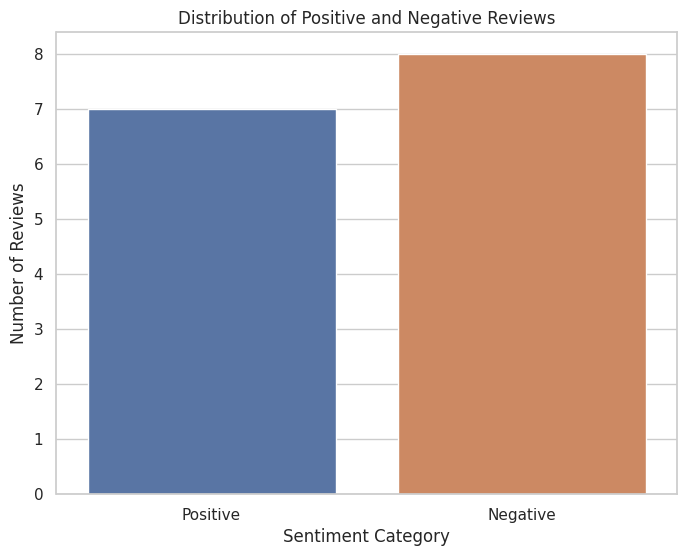

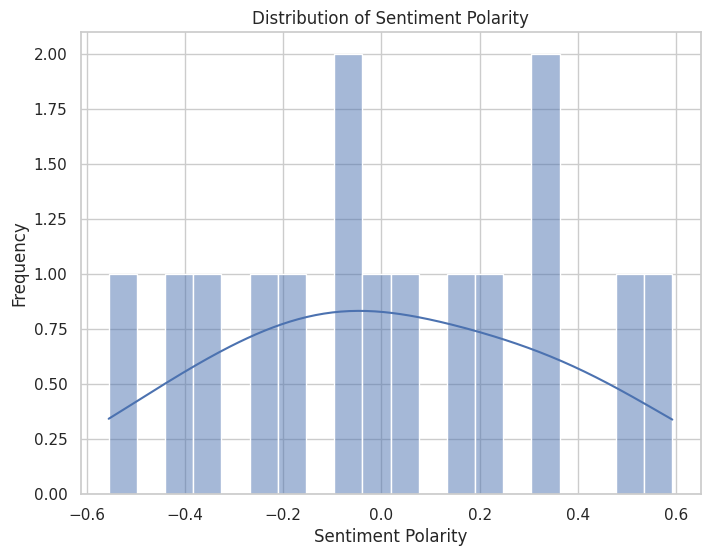

In [ ]:
import requests
from bs4 import BeautifulSoup
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

# ... (your existing code here) ...

# Initialize variables to count positive and negative reviews
positive_reviews_count = 0
negative_reviews_count = 0

# Lists to store sentiment polarity values for all reviews
sentiment_polarity_values = []

if reviews:
    for i, review in enumerate(reviews[:reviews_count]):
        review_text = review.get_text()

        # Perform sentiment analysis using TextBlob
        sentiment = TextBlob(review_text)
        sentiment_polarity = sentiment.sentiment.polarity
        sentiment_subjectivity = sentiment.sentiment.subjectivity

        # Classify the review as positive or negative
        sentiment_category = "Positive" if sentiment_polarity > threshold_polarity else "Negative"

        # Update the counts and collect sentiment polarity values
        if sentiment_category == "Positive":
            positive_reviews_count += 1
        else:
            negative_reviews_count += 1
        sentiment_polarity_values.append(sentiment_polarity)

        # ... (your existing code to print review details) ...

# Create a bar chart to visualize the number of positive and negative reviews
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(x=["Positive", "Negative"], y=[positive_reviews_count, negative_reviews_count])
plt.xlabel("Sentiment Category")
plt.ylabel("Number of Reviews")
plt.title("Distribution of Positive and Negative Reviews")
plt.show()

# Create a histogram to visualize the distribution of sentiment polarity values
plt.figure(figsize=(8, 6))
sns.histplot(sentiment_polarity_values, bins=20, kde=True)
plt.xlabel("Sentiment Polarity")
plt.ylabel("Frequency")
plt.title("Distribution of Sentiment Polarity")
plt.show()


In [ ]:
from matplotlib.container import Container
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://www.trustpilot.com/review/thecheesecakefactory.com"

response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")

customer_containers = soup.find_all('div',attrs = {'class' : 'styles_reviewCardInner__EwDq2'})

customer_names = []
customer_dates = []
customer_ratings = []
customer_reviews=[]
customer_descriptions=[]


for container in customer_containers:

    customer_name = container.find("span", class_="typography_heading-xxs__QKBS8 typography_appearance-default__AAY17").text
    customer_names.append(customer_name)

    customer_date = container.find("p", class_="typography_body-m__xgxZ_ typography_appearance-default__AAY17").text.strip("[[Date of experience, , :], , ,")
    customer_dates.append(customer_date)



    customer_rating = container.find("span", class_="typography_body-m__xgxZ_ typography_appearance-subtle__8_H2l").text.strip("[[, , reviews], , ,")
    customer_ratings.append(customer_rating)

    customer_review = container.find("h2", class_="typography_heading-s__f7029 typography_appearance-default__AAY17")
    customer_reviews.append(customer_review)

    customer_description = container.find("p", class_="typography_body-l__KUYFJ typography_appearance-default__AAY17 typography_color-black__5LYEn")
    customer_descriptions .append(customer_description)

In [ ]:
customer_df = pd.DataFrame({
    'Customer Name': customer_names,
    'Customer Date': customer_dates,
    'Customer Rating': customer_ratings,
    'Customer Review': customer_reviews,
    'Customer Description': customer_descriptions,
})

customer_df

,Customer Name,Customer Date,Customer Rating,Customer Review,Customer Description
0,Pauline,"October 26, 2023",11,[The Cheesecake Factory has always been…Poor e...,[The Cheesecake Factory has always been our fa...
1,Jayne Pavlik,"October 05, 2023",2,[Extrememly Poor Quality],[I ordered a chicken salad sandwich without th...
2,HonestReviewer,"October 30, 2022",3,[Good Experience],"[Not sure why people are complaining, I really..."
3,Liana Walker,"August 09, 2023",2,[Super love their LV branch],"[Super love their LV branch, nice staff and sc..."
4,Carolyn Bailey,"October 01, 2023",1,[The food was excellent],[The food was excellent. I've been to several ...
5,The MaryBelle Baby Doll Projec,"September 27, 2023",1,[Disappointed],[We drove over an hour and had a party of five...
6,Afrooz Zyaei,"September 15, 2023",1,[It was an awful experience],[It was an awful experience. The quality of fo...
7,Anne Conti,"September 25, 2023",1,[Had the family here in town and came…],[Had the family here in town and came for lunc...
8,Elizabeth Hoehne,"September 09, 2023",1,[If going to the cheesecake factory],"[If going to the cheesecake factory, make sure..."
9,Hadi Sadeghiasl,"July 28, 2023",9,[Food was way better than last time],"[Food was way better than last time. , [], Thi..."


In [ ]:
customer_df.to_csv('customer_df.csv', index=False)


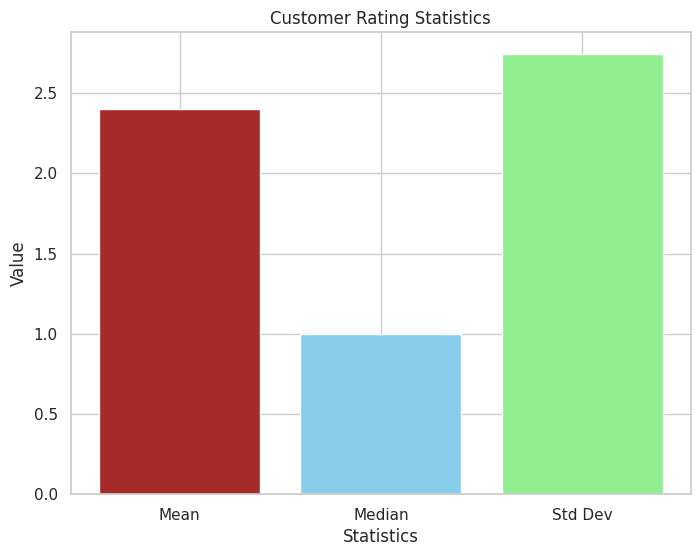

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.DataFrame({
    'Customer Rating': customer_df['Customer Rating'],
})

data['Customer Rating'] = pd.to_numeric(data['Customer Rating'], errors='coerce')


mean_rating = data['Customer Rating'].mean()
median_rating = data['Customer Rating'].median()
std_deviation = data['Customer Rating'].std()

# Create a bar plot
plt.figure(figsize=(8, 6))
stats_labels = ['Mean', 'Median', 'Std Dev']
stats_values = [mean_rating, median_rating, std_deviation]

plt.bar(stats_labels, stats_values, color=['brown', 'skyblue', 'lightgreen'])
plt.xlabel('Statistics')
plt.ylabel('Value')
plt.title('Customer Rating Statistics')
plt.show()


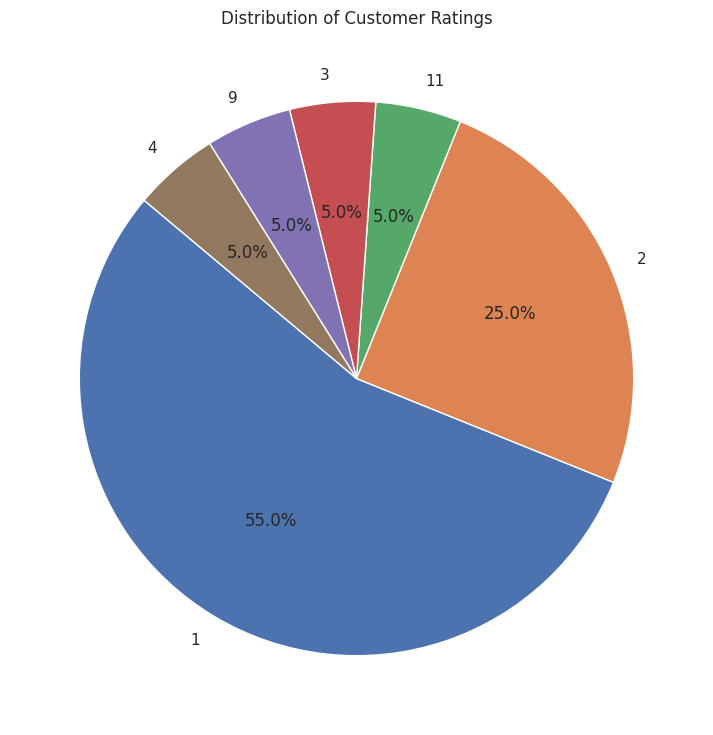

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data or your existing DataFrame
data = pd.DataFrame({
    'Customer Name': customer_df['Customer Name'],
    'Customer Rating': customer_df['Customer Rating'],
    'Customer Review': customer_df['Customer Review']
})

# Count the number of customer reviews with each rating
customer_rating_counts = data['Customer Rating'].value_counts()

# Create a pie chart
plt.figure(figsize=(9, 9))
plt.pie(customer_rating_counts, labels=customer_rating_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Customer Ratings')
plt.show()


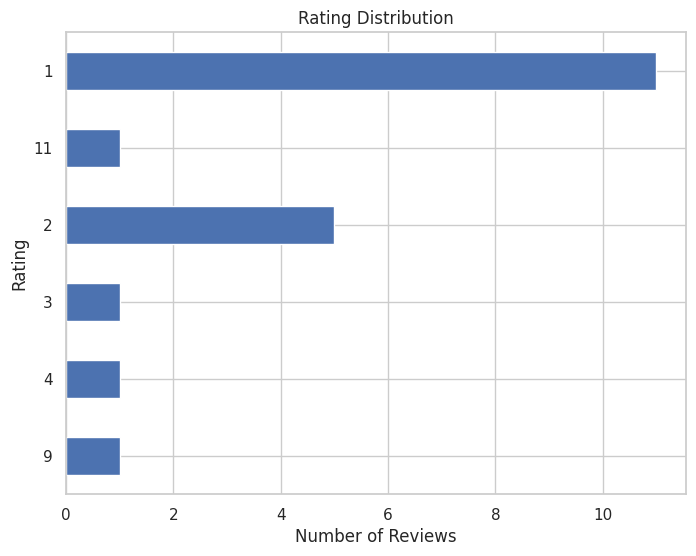

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data or your existing DataFrame
data = pd.DataFrame({
    'Customer Name': customer_df['Customer Name'],
    'Customer Rating': customer_df['Customer Rating'],
    'Customer Review': customer_df['Customer Review']
})

# Count the number of customer reviews for each rating
rating_distribution = data['Customer Rating'].value_counts()

# Create a horizontal bar chart
plt.figure(figsize=(8, 6))
rating_distribution.sort_index(ascending=False).plot(kind='barh')  # Sort by rating in descending order
plt.xlabel('Number of Reviews')
plt.ylabel('Rating')
plt.title('Rating Distribution')
plt.show()
